In [202]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [203]:
dataset = pd.read_csv('50_startups.csv')
X = dataset.iloc[:,:-1].values
y = dataset.iloc[:,-1].values

In [204]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
labelencoder = LabelEncoder()
X[:,3] = labelencoder.fit_transform(X[:,3])
onehotencoder = OneHotEncoder(categorical_features = [3])
X = onehotencoder.fit_transform(X).toarray()

# to avoid dummy variable trap
X = X[:,1:]

In [205]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=0)

In [206]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train,y_train)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [207]:
Answer = regressor.predict(X_test)
difference = ((Answer-y_test)*100)/y_test
print(difference)

[ -0.2586873   -8.09453137  -9.35808176  -7.48434326  -6.54953271
  10.62099971 -16.46869717   1.34194294   3.27785372   1.04287092]


In [209]:
# starting with backward eleimination for better accuracy
import statsmodels.formula.api as sm
def backwardElimination(x, sl):
    numVars = len(x[0])
    for i in range(0, numVars):
        regressor_OLS = sm.OLS(y, x).fit()
        maxVar = max(regressor_OLS.pvalues).astype(float)
        if maxVar > sl:
            for j in range(0, numVars - i):
                if (regressor_OLS.pvalues[j].astype(float) == maxVar):
                    x = np.delete(x, j, 1)
    regressor_OLS.summary()
    return x
 
SL = 0.05
X_opt = X[:, [0, 1, 2, 3, 4]]
X_opt = backwardElimination(X_opt, SL)

In [210]:
from sklearn.model_selection import train_test_split
X_train_opt, X_test_opt, y_train_opt, y_test_opt = train_test_split(X_opt, y, test_size=0.2,random_state=0)
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train_opt,y_train_opt)
Final_Answer = regressor.predict(X_test_opt)

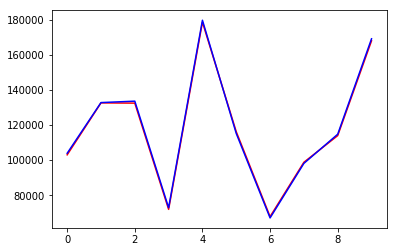

In [211]:
#plt.scatter(X,y)
plt.plot(range(0,10),Answer,color = 'red')
plt.plot(range(0,10),Final_Answer,color = 'blue')

In [212]:
print(Final_Answer)

[103901.8969696  132763.05993126 133567.90370044  72911.78976736
 179627.92567224 115166.64864795  67113.5769057   98154.80686776
 114756.11555221 169064.01408795]


In [213]:
difference = ((Final_Answer-y_test)*100)/y_test
print(difference)

[  0.59982832  -7.96921384  -8.5914856   -6.28163718  -5.97877048
   9.67384262 -17.37738082   0.68857443   3.99073472   1.7306154 ]
